In [2]:
import pandas as pd
import os

In [4]:
os.getcwd()

'C:\\Users\\Admin\\Desktop\\Edyoda\\ML Rishi Bansal\\Assignments\\Assignment 3'

In [6]:
df = pd.read_csv(r'EmployeeExits.txt')

In [7]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [8]:
df.tail()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low
14998,0.37,0.52,2,158,3,0,1,0,support,low


In [9]:
y = df.left
X = df.drop(columns = 'left', axis = 1)

In [12]:
X.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000


In [14]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   promotion_last_5years  14999 non-null  int64  
 7   sales                  14999 non-null  object 
 8   salary                 14999 non-null  object 
dtypes: float64(2), int64(5), object(2)
memory usage: 1.0+ MB


In [18]:
#lets see for missing values object features
X.isnull().sum()
y.isnull().sum()

0

In [19]:
#Okay no missing values

In [20]:
X.sales.unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [21]:
X.salary.unique()

array(['low', 'medium', 'high'], dtype=object)

In [22]:
#For salary we'll use label encoding and for sales we'll use one hot encoding

In [34]:
x_df = X.copy()

In [24]:
from sklearn.preprocessing import OneHotEncoder

In [58]:
oe = OneHotEncoder(drop = 'first',sparse = False)

In [65]:
X = pd.get_dummies(X,columns = ['sales'], drop_first=True)

In [66]:
from sklearn.preprocessing import LabelEncoder

In [67]:
le = LabelEncoder()

In [68]:
maps = {'low':1,'medium':2,'high':3}
X.salary = X.salary.map(maps)

In [70]:
from sklearn.preprocessing import StandardScaler

In [71]:
from sklearn.model_selection import train_test_split

In [72]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3, random_state = 0)

In [73]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [75]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

In [85]:
lor = LogisticRegression()
lor.fit(X_train,y_train)
print(lor.score(X_train,y_train))
print(lor.score(X_test,y_test))

0.7935041432517382
0.7946666666666666


In [78]:
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
print(dt.score(X_train,y_train))
print(dt.score(X_test,y_test))

1.0
0.9786666666666667


In [101]:
imp = dt.feature_importances_
imp_features = [(i,v) for v,i in zip(imp,X.columns)]

In [115]:
heights = [(i,v) for i,v in imp_features if v > 0.003]

In [120]:
heights

[('satisfaction_level', 0.5017896961553291),
 ('last_evaluation', 0.15745398124035007),
 ('number_project', 0.09637531145383563),
 ('average_montly_hours', 0.0960133329621494),
 ('time_spend_company', 0.12971014209030365),
 ('salary', 0.004794448033682778),
 ('sales_technical', 0.003938712443323105)]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<BarContainer object of 7 artists>

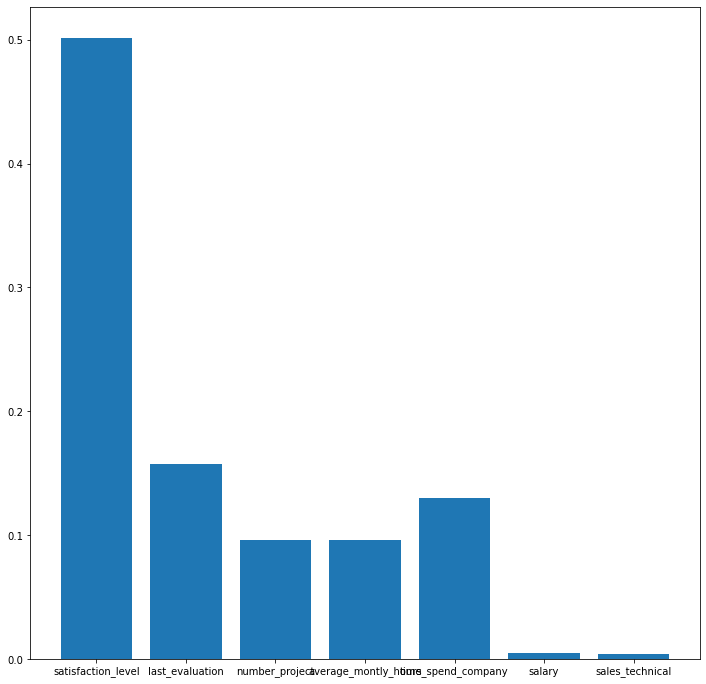

In [121]:
plt.figure(figsize = (12,12))
plt.bar([i for i,v in heights], height = [v for i,v in heights])
#Here we are plotting the features which have a biggest impact on the model!

In [79]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
print(rf.score(X_train,y_train))
print(rf.score(X_test,y_test))

1.0
0.9895555555555555


In [80]:
gnb = GaussianNB()
gnb.fit(X_train,y_train)
print(gnb.score(X_train,y_train))
print(gnb.score(X_test,y_test))

0.7324507095913897
0.7402222222222222
